# PART 3

# Notebook Imports
 

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import pprint

%matplotlib inline

# Constants

In [45]:
DATASET_PATH = "dataset.csv"
RANDOM_STATE = 1
CROSS_VALIDATION_SETS = 5
LABEL_NAMES = ["English", "Urdu", "Mixed"]

In [ ]:
def plot(x, y, xlabel, ylabel, title):
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(x)
    plt.show()

# Importing and Splitting Data

In [3]:
data = pd.read_csv(DATASET_PATH)
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,LABEL
0,0,14.443077,-8.036094,-4.077253,-0.274023,-9.003208,-17.048237,-21.399697,-16.263466,3.396780,-12.284809,0.908476,-10.026655,-4.254287,0
1,1,10.219182,1.742702,1.002258,-2.806073,-14.951893,-21.500796,-13.495337,-9.305933,-7.441661,-1.825364,-8.279968,0.422083,-3.959009,0
2,2,13.876193,1.004525,-10.143044,4.769317,-25.268881,-12.703184,-17.730170,-6.543746,-15.888943,-2.577060,-9.861565,1.551331,-3.312003,0
3,3,12.510054,-3.575093,-4.913943,-6.122454,-3.552648,-9.513949,-10.869105,-8.880711,1.368740,-5.230862,-0.560520,-4.260071,-8.647045,0
4,4,16.165702,7.492517,-18.944081,-11.769776,0.360446,-10.676715,-10.353008,7.848967,0.781196,-0.323822,-6.596552,-6.907072,-4.249575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17375,17375,12.577980,0.449793,8.464243,13.715499,-1.113134,2.922420,-6.761397,2.240919,4.728756,-3.520493,6.343505,1.306161,-3.577430,1
17376,17376,10.832928,5.712939,6.460498,0.479978,-9.827152,-8.491606,-16.057971,-7.821987,-7.278880,-8.225414,-1.474205,-10.781243,-8.982661,1
17377,17377,15.653813,-6.198936,-0.756519,-0.182128,-5.058881,-12.113604,-15.959658,-1.984598,-3.341601,-5.365412,0.485510,-4.278507,-10.961661,1
17378,17378,14.656198,2.442599,-1.116128,-3.430590,-9.892589,-16.597521,-17.447496,-1.346676,-11.960978,-9.395277,-5.763173,-7.353033,-8.212849,1


In [4]:
# randomly shuffle dataframe

train = data.sample(frac=0.8, random_state=RANDOM_STATE)
test = data.drop(train.index)

print("Length of train dataset:", len(train))
print("Length of test dataset:", len(test))

Length of train dataset: 13904
Length of test dataset: 3476


In [5]:
x_train = np.array(train)[:, 1:-1]
y_train = np.array(train)[:, -1]

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (13904, 13)
y_train shape: (13904,)


In [6]:
x_test = np.array(test)[:, 1:-1]
y_test = np.array(test)[:, -1]

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_test shape: (3476, 13)
y_test shape: (3476,)


In [7]:
scaler = StandardScaler()
scaler = scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Training And Validation

In [36]:
# hyper parameters

LEARNING_RATE_INIT = 0.0001
ALPHA = 0.012
HIDDEN_LAYERS = (1024, 512, 512, 256, 32)

In [37]:
model = MLPClassifier(hidden_layer_sizes=(HIDDEN_LAYERS), alpha=ALPHA, learning_rate_init=LEARNING_RATE_INIT)
model.fit(x_train, y_train)

MLPClassifier(alpha=0.012, hidden_layer_sizes=(1024, 512, 512, 256, 32),
              learning_rate_init=0.0001)

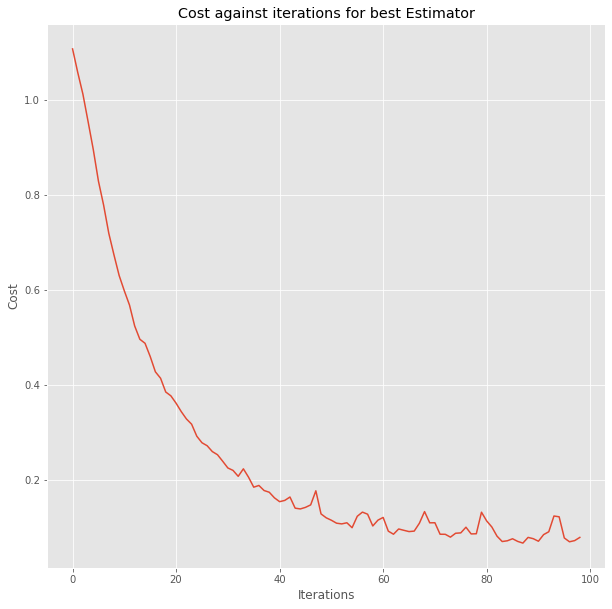

In [40]:
loss = model.loss_curve_

plt.style.use("ggplot")
plt.figure(figsize=(10, 10))
plt.plot(range(len(loss)), loss)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost against iterations for best Estimator")
plt.show()

# 5 Fold CV

In [ ]:
nn = MLPClassifier(hidden_layer_sizes=(HIDDEN_LAYERS), alpha=ALPHA, learning_rate_init=LEARNING_RATE_INIT)
nn.fit(x_train, y_train)

In [46]:
cv_scores = cross_val_score(nn, x_train, y_train, cv=CROSS_VALIDATION_SETS)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
x = [x for x in range(1, CROSS_VALIDATION_SETS + 1)]

plot(x, cv_scores, 'CV Sets', 'Accuracy', '5-Fold CV Accuracy Plot')

# Testing and Evaluation

In [ ]:
preds = model.predict(x_test)

In [ ]:
print(classification_report(y_test, preds, target_names=LABEL_NAMES))

              precision    recall  f1-score   support

     English       0.77      0.78      0.77      1060
        Urdu       0.76      0.77      0.76      1020
       Mixed       0.84      0.82      0.83      1396

    accuracy                           0.79      3476
   macro avg       0.79      0.79      0.79      3476
weighted avg       0.79      0.79      0.79      3476



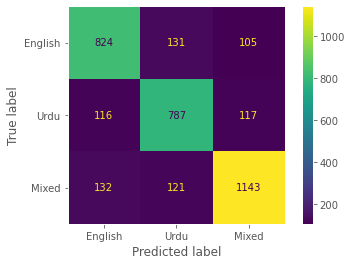

In [ ]:
conf = confusion_matrix(y_test, preds)
matrix_plotter = ConfusionMatrixDisplay(conf, display_labels=LABEL_NAMES)


a = matrix_plotter.plot(ax=None)
a.ax_.grid()
plt.show()